# Switch to estimagic (solution)

In this exercise, you will use estimagic to solve the previous exercise.

## Resources

- [estimagic optimization tutorial](https://estimagic.readthedocs.io/en/stable/getting_started/first_optimization_with_estimagic.html)

In [1]:
import estimagic as em
import numpy as np

## Task 1: Simple switch

- Copy your criterion function and start parameters from the previous example without any changes. 
- Use `em.minimize` to solve the optimization problem. For reasons that will be mentioned later, estimagic has no default algorithm. You can set `algorithm="scipy_neldermead"` for now and will learn how to pick algorithms later. 
- Look at `res.params` and `res.criterion` to make sure the optimization is succeeded.

## Solution 1:

In [2]:
def f(x):
    a = x[0]
    b = x[1:4]
    c = x[4:].reshape(2, 2)

    value = (
        (a - np.pi) ** 2
        + np.sum((b - np.arange(3)) ** 2)
        + np.sum((c - np.eye(2)) ** 2)
    )
    return value


x0 = np.zeros(8)

In [3]:
res = em.minimize(
    criterion=f,
    params=x0,
    algorithm="scipy_neldermead",
)

In [4]:
res.params

array([ 3.14159266e+00, -1.68302929e-09,  1.00000000e+00,  2.00000000e+00,
        1.00000000e+00,  7.12514518e-09,  7.33457472e-11,  1.00000000e+00])

In [5]:
res.criterion

1.1388734391083942e-16

## Task 2: More flexible `params`

In estimagic, parameters can be arbitrary [pytrees](https://jax.readthedocs.io/en/latest/pytrees.html). In the current example, a dictionary with the keys `"a"`, `"b"` and `"c"` would be a good choice. 

- Adjust your function such that it takes a dictionary of parameters instead of a flat numpy array.
- Re-run the optimization with `em.minimize` with the start parameters given below.
- Look at `res.params` and `res.criterion` to make sure that the optimization worked.

## Solution 2:

In [6]:
start_params = {"a": 0, "b": np.zeros(3), "c": np.zeros((2, 2))}


def new_f(x):
    value = (
        (x["a"] - np.pi) ** 2
        + np.sum((x["b"] - np.arange(3)) ** 2)
        + np.sum((x["c"] - np.eye(2)) ** 2)
    )
    return value

In [7]:
res = em.minimize(
    criterion=new_f,
    params=start_params,
    algorithm="scipy_neldermead",
)

In [8]:
res.params

{'a': 3.141592659470512,
 'b': array([-1.68302929e-09,  1.00000000e+00,  2.00000000e+00]),
 'c': array([[1.00000000e+00, 7.12514518e-09],
        [7.33457472e-11, 1.00000000e+00]])}

In [9]:
res.criterion

1.1388734391083942e-16

In [10]:
from numpy.testing import assert_array_almost_equal

assert_array_almost_equal(res.params["a"], np.pi)
assert_array_almost_equal(res.params["b"], np.arange(3))
assert_array_almost_equal(res.params["c"], np.eye(2))

## Task 3: Plotting algorithms against each other

- Run another minimization, but this time use `algorithm="nlopt_neldermead"`. Store the optimization results in a dictionary called `results` with keys matching the algorithm names.
- Use `em.criterion_plot` to visualize the convergence of your optimizations.

## Solution 3:

In [11]:
results = {}
for algorithm in ["scipy_neldermead", "nlopt_neldermead"]:
    results[algorithm] = em.minimize(
        criterion=new_f,
        params=start_params,
        algorithm=algorithm,
    )

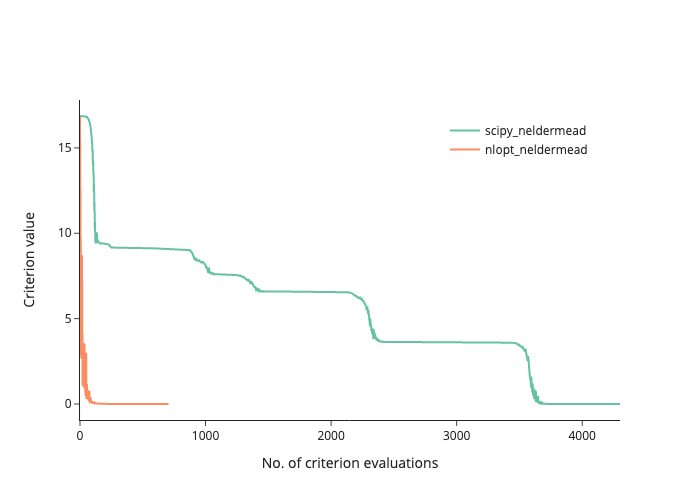

In [12]:
fig = em.criterion_plot(results)
fig.show(renderer="png")